In [4]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

# cache_pathの定義
cache_path = r"C:\Users\100ca\Documents\PyCode\etf\data\etf_weekly_close_cache.pkl"

def load_cache():
    """キャッシュされたデータを読み込む関数"""
    with open(cache_path, "rb") as file:  # バイナリ読み込みモードでファイルを開く
        return pickle.load(file)

def calculate_sharpe_ratios():
    """各ETFのシャープレシオを計算し、それに基づいてETFをランキングする関数。週次データを使用。"""
    cache = load_cache()
    sharpe_ratios = {}

    for etf, records in cache.items():
        # recordsが空でない、かつ'Date'キーを含む辞書のリストであることを確認
        if records and all('Date' in record for record in records):
            try:
                prices_df = pd.DataFrame(records).set_index('Date')
                if 'Close' in prices_df.columns:
                    # 週次リターンを計算
                    returns = prices_df['Close'].pct_change()
                    # 年間リターンの平均と標準偏差を計算
                    mean_return = returns.mean() * 52
                    std_dev = returns.std() * np.sqrt(52)
                    # 無リスクレートを0と仮定してシャープレシオを計算
                    if std_dev != 0:  # 0除算を避ける
                        sharpe_ratio = mean_return / std_dev
                        sharpe_ratios[etf] = sharpe_ratio

    # シャープレシオが0.5以下のものをフィルタリング
    filtered_sharpe_ratios = {etf: ratio for etf, ratio in sharpe_ratios.items() if ratio > 0.5}

    # シャープレシオに基づいてETFをランキング
    sorted_sharpe_ratios = sorted(filtered_sharpe_ratios.items(), key=lambda x: x[1], reverse=True)
    return sorted_sharpe_ratios

def etf_prices():
    """シャープレシオ順にETFの株価をプロットし、それを4つのsubplotに分割して表示する関数"""
    cache = load_cache()
    etf_prices = {}

    # シャープレシオのランキングからETF名を取得
    ranked_etfs = [etf for etf, _ in calculate_sharpe_ratios()]

    for etf in ranked_etfs:
        if etf in cache:
            records = cache[etf]
            if records and all('Date' in record for record in records):
                try:
                    prices_df = pd.DataFrame(records).set_index('Date')
                    if 'Close' in prices_df.columns:
                        etf_prices[etf] = prices_df['Close']
                except Exception as e:
                    print(f"Error processing {etf}: {e}")

    # ETFの株価をCSVファイルに保存
    df_etf_prices = round(pd.DataFrame(etf_prices).dropna(thresh=90, axis=1),1)
    display(df_etf_prices)
    return df_etf_prices


    df_etf_prices.to_csv(r"C:\Users\100ca\Documents\PyCode\etf\data\chart.csv")

    # シャープレシオのランキングを出力
    sharpe_ratios_ranking = calculate_sharpe_ratios()
    for etf, sharpe_ratio in sharpe_ratios_ranking:
        print(f"{etf}: {sharpe_ratio:.2f}")

df_etf_prices = etf_prices()

SyntaxError: expected 'except' or 'finally' block (2266020866.py, line 36)

In [ ]:
# シャープレシオのランキングからETF名を取得
ranked_etfs = [etf for etf, _ in calculate_sharpe_ratios()]

# キャッシュからデータをロード
cache = load_cache()

# ETFの52週間の移動平均リターンを計算
etf_returns = {}
for etf in ranked_etfs:
    if etf in cache:
        records = cache[etf]
        if records and all('Date' in record for record in records):
            try:
                prices_df = pd.DataFrame(records).set_index('Date')
                if 'Close' in prices_df.columns:
                    # 52週間の移動平均リターンを計算
                    prices_df['52_Week_Return'] = prices_df['Close'].pct_change(periods=52)
                    etf_returns[etf] = prices_df['52_Week_Return']
            except Exception as e:
                print(f"Error processing {etf}: {e}")

# ETFリターンのDataFrameを作成
df_returns = pd.DataFrame(etf_returns)

# -0.4を下回ったことのある銘柄を除外
filtered_etfs = df_returns.columns[(df_returns.min() > -0.4)]
df_filtered_returns = df_returns[filtered_etfs]

# 除外後の52週リターンを計算し、NaNを除去して最後の20行を表示
df_filtered_returns = round(df_filtered_returns.dropna(how="all").dropna(axis=1, thresh=80), 2)
display(df_filtered_returns.tail(20))

# 52週間の移動平均リターンをプロット
df_long = pd.melt(df_filtered_returns.reset_index(), id_vars=['Date'], var_name='ETF', value_name='52 Week Return')

# Plotly Expressを使用してインタラクティブなグラフを作成
fig = px.line(df_long, x='Date', y='52 Week Return', color='ETF', 
              title='ETFの52週間移動平均リターン', labels={'52 Week Return': '52週間リターン', 'Date': '日付'})

# グラフを表示
fig.show()

,SMH,XLK,SOXX,IXN,QQQ,VGT,DXJ,MGK,PSI,VONG,...,IVOG,PIO,VT,DIA,MGV,SDVY,VDC,XLB,HEDJ,EXI
Date,,,,,,,,,,,,,,,,,,,,,
2023-10-16,0.53,0.32,0.42,0.31,0.29,0.28,0.34,0.26,0.29,0.21,...,0.06,0.09,0.11,0.07,0.04,0.10,-0.00,0.04,0.15,0.14
2023-10-23,0.43,0.24,0.33,0.23,0.23,0.20,0.32,0.20,0.22,0.15,...,-0.02,0.00,0.05,-0.01,-0.04,0.02,-0.07,0.00,0.10,0.06
2023-10-30,0.56,0.42,0.44,0.40,0.39,0.38,0.38,0.37,0.27,0.29,...,0.06,0.10,0.13,0.05,0.01,0.10,-0.02,0.04,0.15,0.12
2023-11-06,0.42,0.35,0.31,0.31,0.31,0.30,0.34,0.30,0.15,0.24,...,-0.01,0.01,0.07,0.02,-0.02,0.01,-0.04,-0.05,0.10,0.05
2023-11-13,0.48,0.38,0.38,0.35,0.36,0.35,0.36,0.35,0.22,0.28,...,0.03,0.07,0.11,0.04,-0.00,0.08,-0.05,0.00,0.13,0.10
2023-11-20,0.46,0.38,0.37,0.35,0.36,0.34,0.32,0.35,0.21,0.27,...,0.02,0.06,0.10,0.03,-0.01,0.06,-0.06,-0.02,0.12,0.08
2023-11-27,0.44,0.37,0.35,0.34,0.33,0.34,0.36,0.33,0.21,0.26,...,0.04,0.08,0.09,0.05,-0.01,0.09,-0.06,-0.00,0.13,0.09
2023-12-04,0.48,0.43,0.39,0.39,0.39,0.39,0.31,0.40,0.23,0.31,...,0.08,0.10,0.12,0.08,0.02,0.15,-0.05,0.01,0.17,0.12
2023-12-11,0.63,0.50,0.57,0.48,0.48,0.48,0.29,0.46,0.39,0.38,...,0.15,0.17,0.17,0.13,0.06,0.25,-0.01,0.08,0.21,0.18


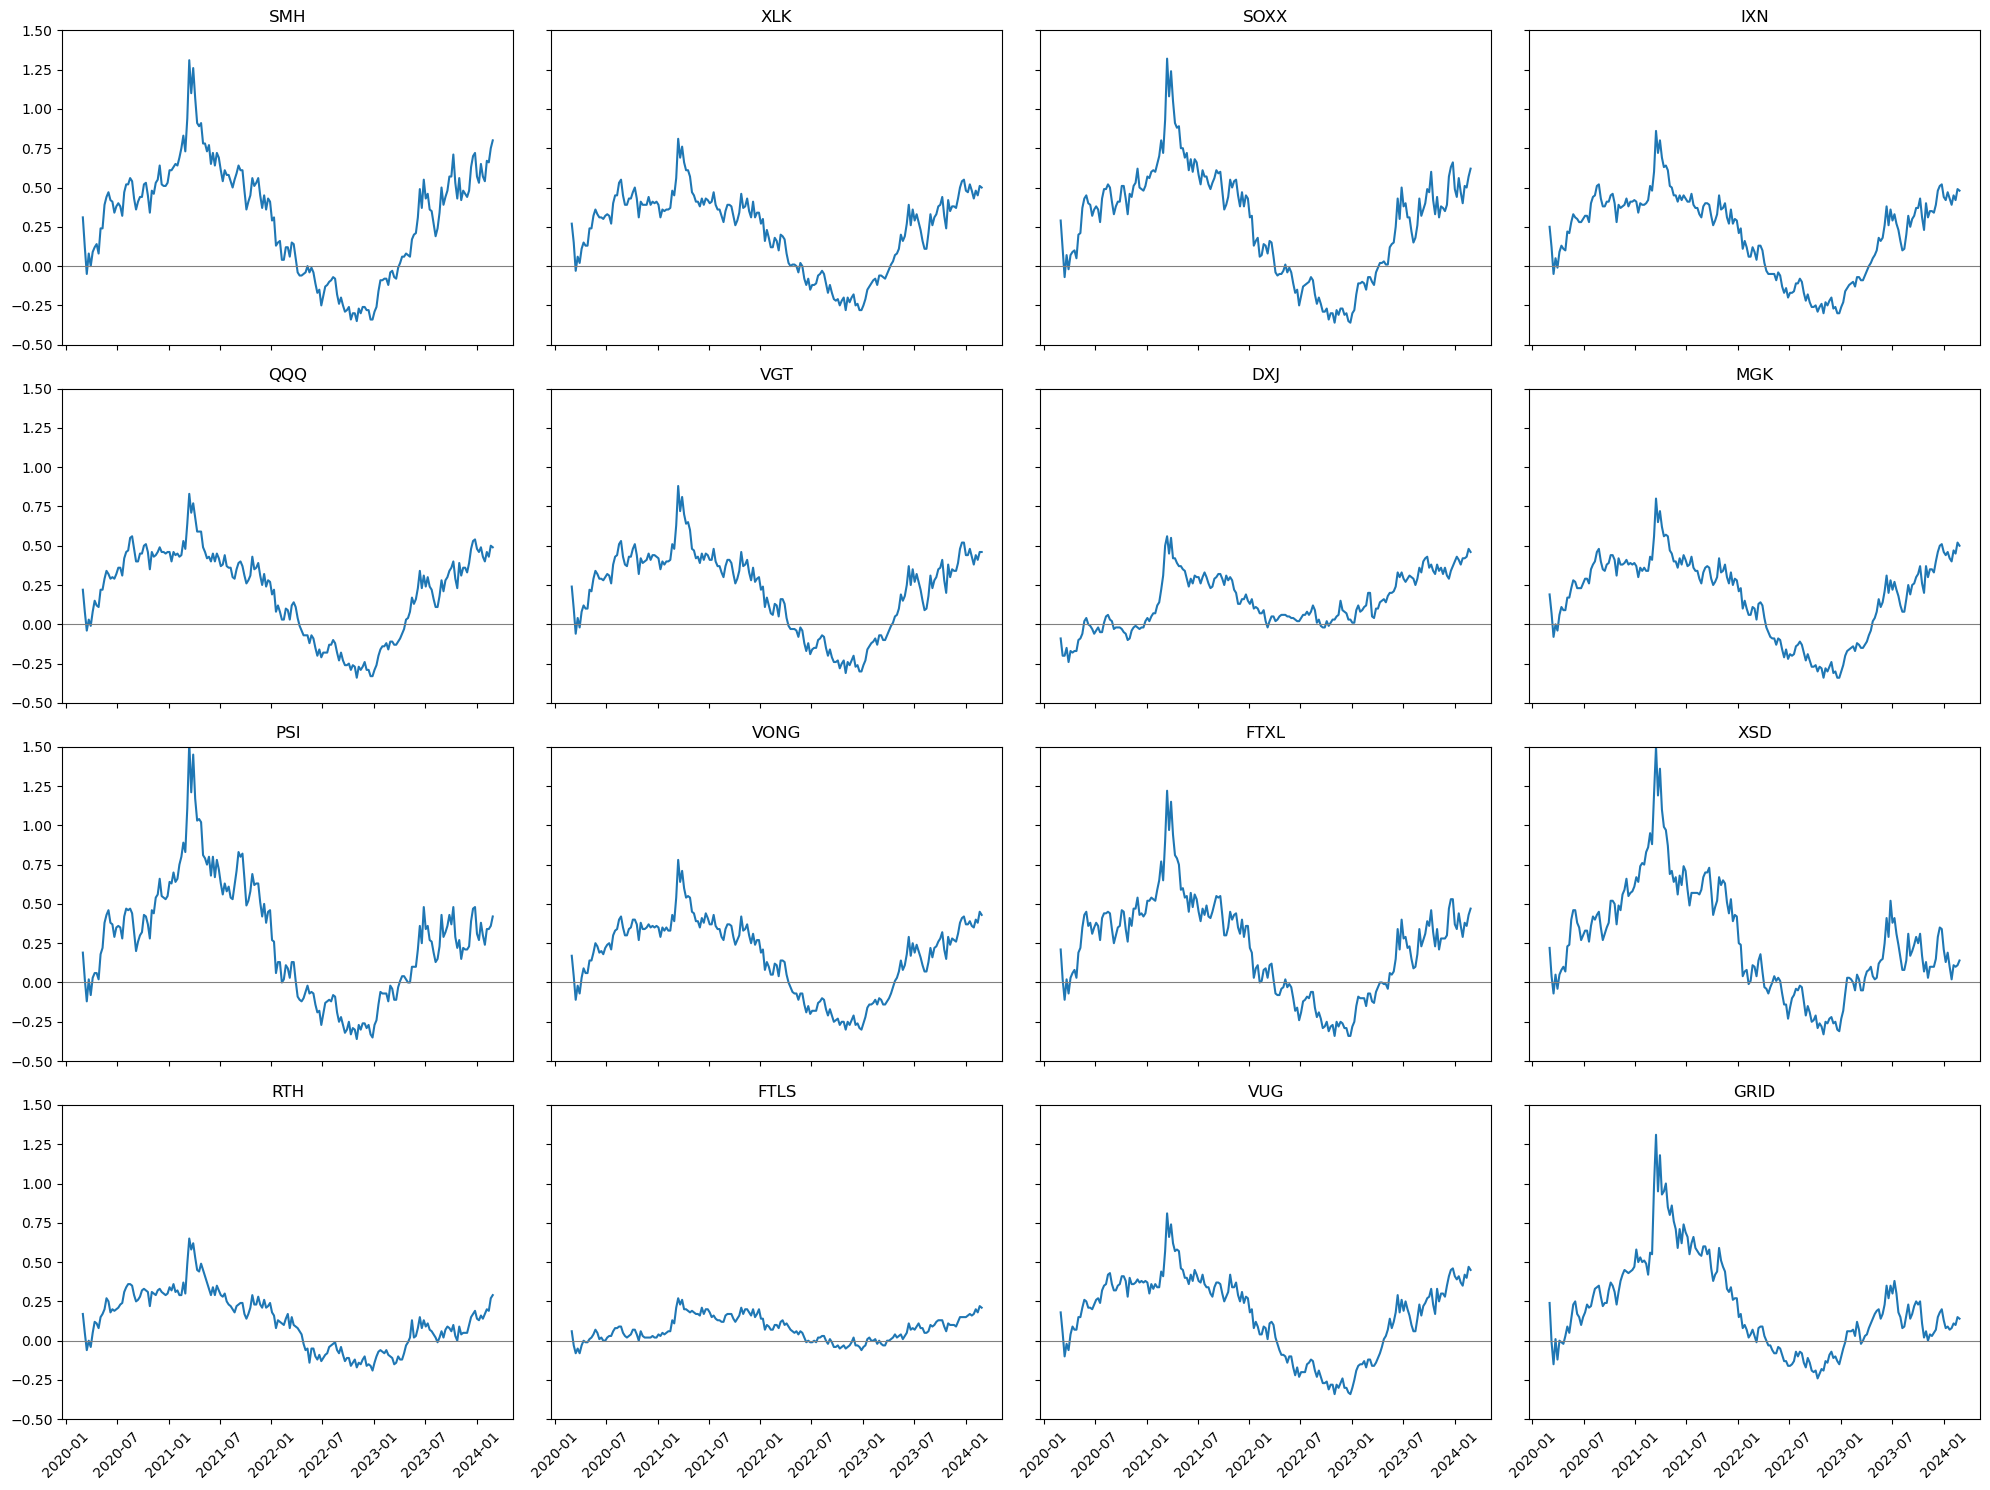

In [ ]:
# 上位16個のETFを4x4のsubplotでプロットし、縦軸を-50%から150%で統一し、0には線を引く
top_16_etfs = df_long['ETF'].unique()[:16]  # 上位16個のETF名を取得
fig, axs = plt.subplots(4, 4, figsize=(20, 15), sharex=True, sharey=True)  # 4x4のsubplotを作成、軸を共有

for i, etf in enumerate(top_16_etfs):
    ax = axs[i//4, i%4]  # subplotの位置を決定
    df_subset = df_long[df_long['ETF'] == etf]  # ETFに対応するデータを抽出
    ax.plot(df_subset['Date'], df_subset['52 Week Return'], label='年率リターン')  # プロット
    ax.axhline(0, color='gray', linewidth=0.8)  # 0の位置に線を引く
    ax.set_title(etf)  # タイトルをETF名に設定
    ax.tick_params(axis='x', rotation=45)  # X軸のラベルを45度回転
    ax.set_ylim(-0.5, 1.5)  # 縦軸の範囲を-50%から150%に設定

# 全てのsubplotで軸が共有されているため、最下行と最左列のみラベルを表示
for ax in axs.flat:
    ax.label_outer()

plt.tight_layout()  # subplot間のスペースを調整
plt.show()  # グラフを表示